In [582]:
import pandas as pd
import numpy as np


df = pd.read_csv('offers_data.csv')
#df = df.drop(columns=['crawlTime'])
#df.head()

In [583]:
#df.info()
num_true = (df['buyBoxWinner'] == True).sum()
num_true

9706

In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               100000 non-null  int64  
 1   asin             100000 non-null  object 
 2   price            100000 non-null  float64
 3   currency         100000 non-null  object 
 4   time             100000 non-null  object 
 5   crawlTime        100000 non-null  object 
 6   condition        100000 non-null  object 
 7   sellerName       100000 non-null  object 
 8   sellerId         100000 non-null  object 
 9   sellerbewertung  76219 non-null   object 
 10  seller_sterne    75383 non-null   object 
 11  lieferdatum      96506 non-null   object 
 12  lieferpreis      96506 non-null   object 
 13  lieferung_durch  100000 non-null  object 
 14  ranking          100000 non-null  int64  
 15  buyBoxWinner     100000 non-null  bool   
 16  numberOfSellers  100000 non-null  int64

## Transform Time Column to Datetime Format

In [585]:
# convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'], format="%Y-%m-%d-%H")

df.head()

,id,asin,price,currency,time,crawlTime,condition,sellerName,sellerId,sellerbewertung,seller_sterne,lieferdatum,lieferpreis,lieferung_durch,ranking,buyBoxWinner,numberOfSellers,trigByReactive
0,1,B016K4GQVG,235.21,€,2023-03-19 13:00:00,2023-03-19 13:30:27.030050,Neu,ComputerPirates DE,A2NVH5TXDWZ5IT,(250 Bewertungen) 89 % positiv in d...,4.5 von 5,3. - 5. April,10€,ComputerPirates DE,0,True,4,False
1,2,B002Y0SID0,49.40,€,2023-03-19 13:00:00,2023-03-19 13:30:27.030805,Neu,amazon,amazon,NaN,NaN,"Mittwoch, 22. März",GRATIS,Amazon,0,True,9,False
2,3,B0000C72GD,93.39,€,2023-03-19 13:00:00,2023-03-19 13:30:27.031304,Neu,STILE IMMAGINE DIGITAL HD,A16E8RFMSALSSB,(29 Bewertungen) 97 % positiv über ...,5 von 5,"Donnerstag, 23. März",GRATIS,Amazon,0,True,2,False
3,4,B0001GRVJQ,55.31,€,2023-03-19 13:00:00,2023-03-19 13:30:27.031882,Neu,amazon,amazon,NaN,NaN,NaN,NaN,Amazon,0,True,8,False
4,5,B0002CZU1U,273.28,€,2023-03-19 13:00:00,2023-03-19 13:30:27.032359,Neu,Musikhaus Kirstein GmbH,A2LUZCVBLA57KT,(38458 Bewertungen) 95 % positiv in...,4.5 von 5,22. - 23. März,"2,99 €",Musikhaus Kirstein GmbH,0,True,3,False


In [586]:
# filter the DataFrame for the 'B0BNC8RXH1 ' ASIN
df2 = df[df['asin'] == 'B0B1QFL177']

# extract the hour component of the 'time' column and filter for rows between 18:00 and 19:00
hour = df2['time'].dt.hour
df2 = df2[(hour >= 16) & (hour < 24)]
df2

,id,asin,price,currency,time,crawlTime,condition,sellerName,sellerId,sellerbewertung,seller_sterne,lieferdatum,lieferpreis,lieferung_durch,ranking,buyBoxWinner,numberOfSellers,trigByReactive
27750,27751,B0B1QFL177,787.72,€,2023-03-19 16:00:00,2023-03-19 16:51:46.421636,Neu,SpecialRecreationRoom,AB9HYAKK6H5GZ,(705 Bewertungen) 93 % positiv in d...,4.5 von 5,"Freitag, 24. März",GRATIS,Amazon,0,True,1,False
36967,36968,B0B1QFL177,787.72,€,2023-03-19 17:00:00,2023-03-19 17:57:11.762181,Neu,SpecialRecreationRoom,AB9HYAKK6H5GZ,(705 Bewertungen) 93 % positiv in d...,4.5 von 5,"Freitag, 24. März",GRATIS,Amazon,0,True,1,False
46157,46158,B0B1QFL177,787.72,€,2023-03-19 19:00:00,2023-03-19 19:02:33.706575,Neu,SpecialRecreationRoom,AB9HYAKK6H5GZ,(705 Bewertungen) 93 % positiv in d...,4.5 von 5,"Freitag, 24. März",GRATIS,Amazon,0,True,1,False
55328,55329,B0B1QFL177,781.15,€,2023-03-19 20:00:00,2023-03-19 20:07:54.579260,Neu,SpecialRecreationRoom,AB9HYAKK6H5GZ,(705 Bewertungen) 93 % positiv in d...,4.5 von 5,"Mittwoch, 22. März",GRATIS,Amazon,0,True,1,False
64673,64674,B0B1QFL177,787.72,€,2023-03-19 21:00:00,2023-03-19 21:35:49.195264,Neu,SpecialRecreationRoom,AB9HYAKK6H5GZ,(705 Bewertungen) 93 % positiv in d...,4.5 von 5,"Freitag, 24. März",GRATIS,Amazon,0,True,1,False
73883,73884,B0B1QFL177,787.72,€,2023-03-19 22:00:00,2023-03-19 22:41:24.268414,Neu,SpecialRecreationRoom,AB9HYAKK6H5GZ,(705 Bewertungen) 93 % positiv in d...,4.5 von 5,"Freitag, 24. März",GRATIS,Amazon,0,True,1,False
83062,83063,B0B1QFL177,795.64,€,2023-03-19 23:00:00,2023-03-19 23:46:38.458695,Neu,SpecialRecreationRoom,AB9HYAKK6H5GZ,(706 Bewertungen) 93 % positiv in d...,4.5 von 5,"Freitag, 24. März",GRATIS,Amazon,0,True,1,False


## Transforming/Adding Missing Rows/Times
Missing Rows are "Replaced" by the rows for the same asin one hour before

In [587]:
import pandas as pd

# assuming your CSV file is called "offers_data.csv"
#df = pd.read_csv('offers_data.csv', parse_dates=['time'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d-%H'))

# create a MultiIndex using columns "asin", "time", and "id"
df.set_index(['asin', 'time', 'id'], inplace=True)

# sort the DataFrame by the MultiIndex
df.sort_index(inplace=True)

# Initialize an empty list called asins_and_gaps
asins_and_gaps = []

def check_one_hour_gap(group):
    group = group.reset_index()  # reset index before indexing with missing_gap Series
    time_diff = group['time'].diff()
    one_hour_gap = pd.Timedelta(hours=1)
    missing_gap = time_diff > one_hour_gap

    if missing_gap.any():
        gap_start_time = group['time'][missing_gap].iloc[0] - one_hour_gap
        missing_hour = gap_start_time.strftime("%Y-%m-%d %H")
        asin = group["asin"].iloc[0]
        print(f'Missing one-hour gap in ASIN {asin} at {missing_hour}')
        print("-------------------------")
        print("\n")

        # Add the ASIN and the missing hour to the asins_and_gaps list
        asins_and_gaps.append((asin, missing_hour))

# apply custom function to each group
df.groupby('asin').apply(check_one_hour_gap)

#print("ASINs and gaps:")
#print(asins_and_gaps)
#asins_and_gaps
distinct_asins = {tup[0] for tup in asins_and_gaps}
print(f"For {len(distinct_asins)} there is at least one time Gap")
print(f"In Total there are {len(asins_and_gaps)} time Gaps")

Missing one-hour gap in ASIN B00000JD6K at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B00005KIRS at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B00008K61M at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B00008K61N at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B0000C72GD at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B0000D85OD at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B0000WOK04 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B0000WOK9A at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B0001GRVJQ at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B00022749Q at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B0002CZU1U at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B0002CZYW0 at 2023-03-19 18
--------

Missing one-hour gap in ASIN B007MP7OP0 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B007PC6JRY at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B007WQJSGM at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B007Y341L0 at 2023-03-19 20
-------------------------


Missing one-hour gap in ASIN B007ZXWQ8E at 2023-03-19 15
-------------------------


Missing one-hour gap in ASIN B0081R34J8 at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B0089E5VLC at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B008BH59BO at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B008BH6634 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B008F7WGCK at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B008F8DT8O at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B008F8DTAM at 2023-03-19 18
--------

Missing one-hour gap in ASIN B00T031DAE at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B00V6IJ27C at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B00VA5HNL8 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B00VEF9YH0 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B00WS8QCP4 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B00X3WBPEM at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B00X3WCICA at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B00X3WD6K8 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B00X4F8564 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B00XLFYP2U at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B00XWLVDUU at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B00YNJGBL6 at 2023-03-19 18
--------

Missing one-hour gap in ASIN B074PMVJJ8 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B074WBSJ9J at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B0752V1XFG at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B0752XV66X at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B0756DRR6M at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B075LG1P79 at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B076CKHGKZ at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B076KZL9HH at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B076SV43NQ at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B076TBCTTV at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B076WZCQ2B at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B076X28H9S at 2023-03-19 17
--------

Missing one-hour gap in ASIN B07NGV259P at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B07NJ5RQL7 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B07NVQL19Q at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B07NVQZG71 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B07NZC5NZJ at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B07P296595 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B07P495TQ4 at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B07P581CK8 at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B07P6M72DS at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B07PWXN3RG at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B07PZQ55PC at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B07Q2RKC7D at 2023-03-19 18
--------

Missing one-hour gap in ASIN B089NL2XT6 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B089QXQ1TV at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B089STTMXZ at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B089SXQKGN at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B089WDFV5H at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B08B32YPQH at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B08BLRL3WJ at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B08BTLTVMG at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B08BZMV8XP at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B08BZPXCKD at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B08BZQWDBM at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B08C5F6JJ3 at 2023-03-19 17
--------

Missing one-hour gap in ASIN B0936FGLQS at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B093JN5PHY at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B093SR5KFY at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B093WJ43BD at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B093Z5MYR1 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B0943P3G8K at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B094DHT89T at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B094NWC88Y at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B09533GQL2 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B09536GMG1 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B095SQTCSM at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B095THXRMH at 2023-03-19 18
--------

Missing one-hour gap in ASIN B09V7ZTP7T at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B09V81VNLP at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B09VKKWJ1F at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B09VPJTF4N at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B09VSZF1LZ at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B09W2ZB75P at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B09W5G56D1 at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B09WTNPW83 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B09X93FQNP at 2023-03-19 17
-------------------------


Missing one-hour gap in ASIN B09Y5K3LHZ at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B09YD4PGH9 at 2023-03-19 18
-------------------------


Missing one-hour gap in ASIN B09YMBJTLV at 2023-03-19 18
--------

In [588]:
import pandas as pd

# Assuming you already have the DataFrame df and the asins_and_gaps list

# Initialize an empty DataFrame called missing_data_df
missing_data_df = pd.DataFrame()

for asin, gap_time_str in asins_and_gaps:
    # Convert the gap time string to a datetime object
    gap_time = pd.to_datetime(gap_time_str, format='%Y-%m-%d %H')

    matching_rows = pd.DataFrame()
    gap_found = 0

    # Search for rows up to 3 hours earlier
    for hours in range(1, 4):
        time_earlier = gap_time - pd.Timedelta(hours=hours)
        matching_rows = df.loc[(df.index.get_level_values('asin') == asin) & (df.index.get_level_values('time') == time_earlier)]

        if not matching_rows.empty:
            gap_found = -hours
            break

    # If matching rows are found
    if not matching_rows.empty:
        # Make a copy of matching_rows before modifying it
        matching_rows = matching_rows.copy()

        # Update the time column value for the copied rows to the appropriate gap
        matching_rows.reset_index(inplace=True)
        matching_rows[matching_rows.columns[matching_rows.columns.get_loc('time')]] = matching_rows['time'] - pd.Timedelta(hours=gap_found)

        # Add a new column named "time_gap" to indicate the gap at which the rows were found
        matching_rows['time_gap'] = gap_found

        # Append the matching rows to the missing_data_df DataFrame
        missing_data_df = pd.concat([missing_data_df, matching_rows])

# Reset the index of the missing_data_df DataFrame
missing_data_df.reset_index(drop=True, inplace=True)
#missing_data_df.info()
distinct_values = missing_data_df['asin'].nunique()
distinct_values
print(f"For {distinct_values} there could be found rows from 1/2/3 hourls earlier to repace the time gap")

For 967 there could be found rows from 1/2/3 hourls earlier to repace the time gap


In [589]:
#missing_data_df.info()

In [590]:
###Always Test your CODE
# filter the DataFrame for the 'B0BNC8RXH1 ' ASIN
df2 = missing_data_df[missing_data_df['asin'] == 'B0B1QFL177']

# extract the hour component of the 'time' column and filter for rows between 18:00 and 19:00
hour = df2['time'].dt.hour
df2 = df2[(hour >= 16) & (hour < 20)]
df2

,asin,time,id,price,currency,crawlTime,condition,sellerName,sellerId,sellerbewertung,seller_sterne,lieferdatum,lieferpreis,lieferung_durch,ranking,buyBoxWinner,numberOfSellers,trigByReactive,time_gap
9023,B0B1QFL177,2023-03-19 18:00:00,36968,787.72,€,2023-03-19 17:57:11.762181,Neu,SpecialRecreationRoom,AB9HYAKK6H5GZ,(705 Bewertungen) 93 % positiv in d...,4.5 von 5,"Freitag, 24. März",GRATIS,Amazon,0,True,1,False,-1


In [591]:
missing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9323 entries, 0 to 9322
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   asin             9323 non-null   object        
 1   time             9323 non-null   datetime64[ns]
 2   id               9323 non-null   int64         
 3   price            9323 non-null   float64       
 4   currency         9323 non-null   object        
 5   crawlTime        9323 non-null   object        
 6   condition        9323 non-null   object        
 7   sellerName       9323 non-null   object        
 8   sellerId         9323 non-null   object        
 9   sellerbewertung  7114 non-null   object        
 10  seller_sterne    7039 non-null   object        
 11  lieferdatum      8989 non-null   object        
 12  lieferpreis      8989 non-null   object        
 13  lieferung_durch  9323 non-null   object        
 14  ranking          9323 non-null   int64  

In [592]:
#df.info()
df['time_gap'] = 0
df['copyed_cause_missing'] = False
df = df.reset_index()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   asin                  100000 non-null  object        
 1   time                  100000 non-null  datetime64[ns]
 2   id                    100000 non-null  int64         
 3   price                 100000 non-null  float64       
 4   currency              100000 non-null  object        
 5   crawlTime             100000 non-null  object        
 6   condition             100000 non-null  object        
 7   sellerName            100000 non-null  object        
 8   sellerId              100000 non-null  object        
 9   sellerbewertung       76219 non-null   object        
 10  seller_sterne         75383 non-null   object        
 11  lieferdatum           96506 non-null   object        
 12  lieferpreis           96506 non-null   object        
 13  

In [593]:
missing_data_df['copyed_cause_missing'] = True
df = pd.concat([df, missing_data_df])

In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109323 entries, 0 to 9322
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   asin                  109323 non-null  object        
 1   time                  109323 non-null  datetime64[ns]
 2   id                    109323 non-null  int64         
 3   price                 109323 non-null  float64       
 4   currency              109323 non-null  object        
 5   crawlTime             109323 non-null  object        
 6   condition             109323 non-null  object        
 7   sellerName            109323 non-null  object        
 8   sellerId              109323 non-null  object        
 9   sellerbewertung       83333 non-null   object        
 10  seller_sterne         82422 non-null   object        
 11  lieferdatum           105495 non-null  object        
 12  lieferpreis           105495 non-null  object        
 13  l

In [595]:
## Save Offers_data to File with filled Data
df.to_csv('offers_without_gaps.csv', index=False)


In [596]:
df = pd.read_csv('offers_without_gaps.csv')

## Transforming Dataframe Seller Sterne

In [597]:
## IS transformation necessary?
distinct_values = df['seller_sterne'].unique()
distinct_values

null_sterne_df = df[df['seller_sterne'].isnull()]
unique_seller_names = null_sterne_df['sellerName'].unique()
unique_seller_names

# get the seller names where 'seller_sterne' is null
null_seller_names = df.loc[df['seller_sterne'].isnull(), 'sellerName']

# check if there are any rows where 'seller_sterne' is not null for the null seller names
has_sterne_values = df.loc[df['sellerName'].isin(null_seller_names) & ~df['seller_sterne'].isnull()]

# print the result
if has_sterne_values.empty:
    print("There are no rows where 'seller_sterne' is not null for the null seller names.")
else:
    print("There are rows where 'seller_sterne' is not null for the null seller names.")

There are no rows where 'seller_sterne' is not null for the null seller names.


In [598]:

# define a lambda function to convert the string to a float or return None for null values
str_to_float_or_none = lambda x: float(x.split()[0].replace(",", ".")) if isinstance(x, str) and len(x.split()) > 0 else None

# apply the lambda function to the 'seller_sterne' column to replace the string values with their corresponding float values
df['seller_sterne'] = df['seller_sterne'].apply(str_to_float_or_none)

# select the rows where 'sellerName' does not contain 'amazon'
no_amazon_df = df[~df['sellerName'].str.contains('amazon', case=False)]

# calculate the rounded value of 'seller_sterne'
average_sterne = no_amazon_df['seller_sterne'].mean()
rounded_sterne = round(average_sterne * 2) / 2

# replace the null values in 'seller_sterne' with the rounded value for non-amazon rows, and with 5.0 for amazon rows
df.loc[~df['sellerName'].str.contains('amazon', case=False), 'seller_sterne'] = rounded_sterne
df.loc[df['sellerName'].str.contains('amazon', case=False), 'seller_sterne'] = 5.0

## Transformin Dataframe Lieferpreis


In [599]:
df['lieferpreis'] = df['lieferpreis'].replace(['GRATIS', 'FREE'], 0.0)
##Replace Euro Signs
df['lieferpreis'] = df['lieferpreis'].replace('€', '', regex=True)
df = df.replace(',', '.', regex=True)
df['lieferpreis'] = df['lieferpreis'].astype(float, errors='ignore')
num_missing = df['lieferpreis'].isna().sum()
print(f"The column 'lieferpreis' has {num_missing} missing values.")


The column 'lieferpreis' has 3828 missing values.


In [600]:
null_sterne_df = df[df['seller_sterne'].isnull()]
unique_seller_names = null_sterne_df['sellerName'].unique()
unique_seller_names

array([], dtype=object)

## Transform Dataframe Sellerbewertung


In [601]:
# Split values into two columns based on first space
df[['vorderer_Teil', 'hinterer_Teil']] = df['sellerbewertung'].str.split(')', 1, expand=True)
df['hinterer_Teil'] = df['hinterer_Teil'].str.replace('%.*', '', regex=True)
# Replace NaN values in vorderer_Teil column with 0
df['vorderer_Teil'] = df['vorderer_Teil'].fillna(0)
df['vorderer_Teil'] = df['vorderer_Teil'].str.extract('(\d+)').astype(float)
df['hinterer_Teil'] = df['hinterer_Teil'].astype(float) / 100.0
df['sellerbewertung_ausgerechnet'] = df['vorderer_Teil'] * df['hinterer_Teil']
df['sellerbewertung'] = df['sellerbewertung_ausgerechnet']

# Drop columns that were created in the process
df = df.drop(['vorderer_Teil', 'hinterer_Teil', 'sellerbewertung_ausgerechnet'], axis=1)

C:\Users\robertbetschinger\AppData\Local\Temp\ipykernel_22000\2410512019.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['vorderer_Teil', 'hinterer_Teil']] = df['sellerbewertung'].str.split(')', 1, expand=True)


In [602]:
#print(df[['sellerName', 'lieferung_durch']].head(5000).to_string(index=False))
df['Fulfillment_type'] = ['FBA' if 'amazon' in x.lower() else 'FBM' for x in df['lieferung_durch']]

## Transform Dataframe Lieferdauer

In [603]:
df['month'] = -1

# loop over each row in the dataframe
for i, row in df.iterrows():
    # check if the 'lieferdatum' value contains the word "April"
    if 'April' in str(row['lieferdatum']):
        # if it does, set the 'month' value to 4
        df.at[i, 'month'] = 4
    # if it does not, check if the 'lieferdatum' value contains the word "März"
    elif 'März' in str(row['lieferdatum']):
        # if it does, set the 'month' value to 3
        df.at[i, 'month'] = 3

In [604]:
import re
df['days'] = [[] for _ in range(len(df.index))]

# loop over each row in the dataframe
for i, row in df.iterrows():
    # extract all the numeric values from the 'lieferdatum' value using regular expressions
    nums = re.findall(r'\d+', str(row['lieferdatum']))
    # add the numeric values as a list to the 'days' column for this row
    df.at[i, 'days'] = [int(num) for num in nums]

In [605]:
# calculate the average value of each non-empty array in the 'days' column
avg_days = df['days'].apply(lambda x: sum(x)/len(x) if x else np.nan)

# replace the 'days' column with the average values
df['days'] = avg_days.astype(float)
#df['lieferdatum']


In [606]:
df['datetime'] = pd.to_datetime(df['time'].str[:10], format='%Y-%m-%d')
# create a new column called 'lieferdatum_datetime' and initialize it to NaN
df['lieferdatum_datetime'] = np.nan

# loop over each row in the dataframe
for i, row in df.iterrows():
    # get the 'month' and 'days' values for this row
    month = row['month']
    days = row['days']
    
    # skip this row if the 'month' or 'days' value is NaN or -1
    if np.isnan(days) or month == -1:
        continue
    
    # create a datetime object for this row and extract only the date portion
    date_str = f"2023-{int(month):02d}-{int(days):02d}"
    datetime_obj = pd.to_datetime(date_str, format='%Y-%m-%d')
    date_only = datetime_obj.date()
    
    # save the date object to the 'lieferdatum_datetime' column for this row
    df.at[i, 'lieferdatum_datetime'] = date_only
df.head()

# convert 'lieferdatum_datetime' column to a Pandas Timestamp object
df['lieferdatum_datetime'] = pd.to_datetime(df['lieferdatum_datetime'])
df['date_diff'] = np.where(df['lieferdatum_datetime'].isna(), np.nan, (df['lieferdatum_datetime'] - df['datetime']).dt.days)
df = df.drop(['days', 'month', 'datetime','lieferdatum_datetime'], axis=1)
df.head()


,asin,time,id,price,currency,crawlTime,condition,sellerName,sellerId,sellerbewertung,...,lieferpreis,lieferung_durch,ranking,buyBoxWinner,numberOfSellers,trigByReactive,time_gap,copyed_cause_missing,Fulfillment_type,date_diff
0,B00000JD6K,2023-03-19 13:00:00,1919,95.0,€,2023-03-19 13:31:27.889305,Neu,Kidia,A2XUKJNGI8V9XU,46.56,...,0.0,Amazon,0,True,2,False,0,False,FBA,3.0
1,B00000JD6K,2023-03-19 13:00:00,2375,86.9,€,2023-03-19 13:31:28.080901,Neu,STILE IMMAGINE DIGITAL HD,A16E8RFMSALSSB,28.13,...,9.9,STILE IMMAGINE DIGITAL HD,1,False,1,False,0,False,FBM,7.0
2,B00000JD6K,2023-03-19 14:00:00,11131,95.8,€,2023-03-19 14:36:46.595551,Neu,Kidia,A2XUKJNGI8V9XU,46.56,...,0.0,Amazon,0,True,2,False,0,False,FBA,3.0
3,B00000JD6K,2023-03-19 14:00:00,11585,86.9,€,2023-03-19 14:36:46.805501,Neu,STILE IMMAGINE DIGITAL HD,A16E8RFMSALSSB,28.13,...,9.9,STILE IMMAGINE DIGITAL HD,1,False,1,False,0,False,FBM,27.0
4,B00000JD6K,2023-03-19 15:00:00,20373,95.8,€,2023-03-19 15:43:49.220017,Neu,Kidia,A2XUKJNGI8V9XU,46.56,...,0.0,Amazon,0,True,2,False,0,False,FBA,3.0


## Transform Price

In [607]:
# Select rows where the 'price' column is between 1 and 2
selected_rows = df[(df['price'] >= 1) & (df['price'] <= 2)]
selected_rows.head()

,asin,time,id,price,currency,crawlTime,condition,sellerName,sellerId,sellerbewertung,...,lieferpreis,lieferung_durch,ranking,buyBoxWinner,numberOfSellers,trigByReactive,time_gap,copyed_cause_missing,Fulfillment_type,date_diff
27323,B01FE7K184,2023-03-19 13:00:00,91,1.074,€,2023-03-19 13:30:27.082622,Neu,GetMarket,AKAKN0OST1C61,58.59,...,9.99,GetMarket,0,True,6,False,0,False,FBM,6.0
27324,B01FE7K184,2023-03-19 13:00:00,715,1.092,€,2023-03-19 13:30:27.322005,Neu,Expert AGD,AOS70U5QYUX7,412.30,...,20.09,Expert AGD,1,False,5,False,0,False,FBM,21.0
27325,B01FE7K184,2023-03-19 13:00:00,716,1.061,€,2023-03-19 13:30:27.322301,Neu,E-Mistero,A1T7OOZ029MPBM,47.52,...,78.57,E-Mistero,2,False,5,False,0,False,FBM,21.0
27326,B01FE7K184,2023-03-19 13:00:00,717,1.250,€,2023-03-19 13:30:27.322599,Neu,SIA Solution,A1FCEJIAD39E3Y,0.00,...,0.00,SIA Solution,3,False,5,False,0,False,FBM,33.0
27327,B01FE7K184,2023-03-19 13:00:00,718,1.242,€,2023-03-19 13:30:27.323125,Neu,Solution 4YOU,A3UY995ZKNNQ2M,82.40,...,0.00,Solution 4YOU,4,False,5,False,0,False,FBM,32.0


In [608]:
#Prices over 1000 € are misinterpreted due to a wrongly placed . sign. Transforming it.
## All Prices below 2 Euros where checked if Products where existing, for which this price is real. All Products under question are actully priced over 1000€
# Select rows where the 'price' column is between 1 and 2
#selected_rows = df[(df['price'] >= 1) & (df['price'] <= 2)]
# Replace the period '.' with an empty string '' in the 'price' column
#selected_rows['price'] = selected_rows['price'].astype(str).str.replace('.', '')
# Convert the 'price' column to a float data type
#selected_rows['price'] = selected_rows['price'].astype(float)
# Multiply the price by 10 for rows where price is less than 1000 and already converted to float type
#selected_rows.loc[(selected_rows['price'] < 1000) & (selected_rows['price'] >= 1) & (selected_rows['price'].apply(lambda x: isinstance(x, float))), 'price'] *= 10
# Update the original DataFrame with the updated values
#df.update(selected_rows)
# Print the result
#selected_rows.head()

# Select rows where the 'price' column is between 1 and 2
selected_rows = df[(df['price'] >= 1) & (df['price'] <= 2)]

# Multiply the price by 1000 for rows where the price is between 1 and 2
selected_rows.loc[(selected_rows['price'] >= 1) & (selected_rows['price'] <= 2), 'price'] *= 1000

# Update the original DataFrame with the updated values
df.update(selected_rows)

# Print the result
selected_rows.head()

C:\Users\robertbetschinger\AppData\Local\Temp\ipykernel_22000\762378472.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows.loc[(selected_rows['price'] >= 1) & (selected_rows['price'] <= 2), 'price'] *= 1000


,asin,time,id,price,currency,crawlTime,condition,sellerName,sellerId,sellerbewertung,...,lieferpreis,lieferung_durch,ranking,buyBoxWinner,numberOfSellers,trigByReactive,time_gap,copyed_cause_missing,Fulfillment_type,date_diff
27323,B01FE7K184,2023-03-19 13:00:00,91,1074.0,€,2023-03-19 13:30:27.082622,Neu,GetMarket,AKAKN0OST1C61,58.59,...,9.99,GetMarket,0,True,6,False,0,False,FBM,6.0
27324,B01FE7K184,2023-03-19 13:00:00,715,1092.0,€,2023-03-19 13:30:27.322005,Neu,Expert AGD,AOS70U5QYUX7,412.30,...,20.09,Expert AGD,1,False,5,False,0,False,FBM,21.0
27325,B01FE7K184,2023-03-19 13:00:00,716,1061.0,€,2023-03-19 13:30:27.322301,Neu,E-Mistero,A1T7OOZ029MPBM,47.52,...,78.57,E-Mistero,2,False,5,False,0,False,FBM,21.0
27326,B01FE7K184,2023-03-19 13:00:00,717,1250.0,€,2023-03-19 13:30:27.322599,Neu,SIA Solution,A1FCEJIAD39E3Y,0.00,...,0.00,SIA Solution,3,False,5,False,0,False,FBM,33.0
27327,B01FE7K184,2023-03-19 13:00:00,718,1242.0,€,2023-03-19 13:30:27.323125,Neu,Solution 4YOU,A3UY995ZKNNQ2M,82.40,...,0.00,Solution 4YOU,4,False,5,False,0,False,FBM,32.0


In [609]:
df.head()

,asin,time,id,price,currency,crawlTime,condition,sellerName,sellerId,sellerbewertung,...,lieferpreis,lieferung_durch,ranking,buyBoxWinner,numberOfSellers,trigByReactive,time_gap,copyed_cause_missing,Fulfillment_type,date_diff
0,B00000JD6K,2023-03-19 13:00:00,1919.0,95.0,€,2023-03-19 13:31:27.889305,Neu,Kidia,A2XUKJNGI8V9XU,46.56,...,0.0,Amazon,0.0,True,2.0,False,0.0,False,FBA,3.0
1,B00000JD6K,2023-03-19 13:00:00,2375.0,86.9,€,2023-03-19 13:31:28.080901,Neu,STILE IMMAGINE DIGITAL HD,A16E8RFMSALSSB,28.13,...,9.9,STILE IMMAGINE DIGITAL HD,1.0,False,1.0,False,0.0,False,FBM,7.0
2,B00000JD6K,2023-03-19 14:00:00,11131.0,95.8,€,2023-03-19 14:36:46.595551,Neu,Kidia,A2XUKJNGI8V9XU,46.56,...,0.0,Amazon,0.0,True,2.0,False,0.0,False,FBA,3.0
3,B00000JD6K,2023-03-19 14:00:00,11585.0,86.9,€,2023-03-19 14:36:46.805501,Neu,STILE IMMAGINE DIGITAL HD,A16E8RFMSALSSB,28.13,...,9.9,STILE IMMAGINE DIGITAL HD,1.0,False,1.0,False,0.0,False,FBM,27.0
4,B00000JD6K,2023-03-19 15:00:00,20373.0,95.8,€,2023-03-19 15:43:49.220017,Neu,Kidia,A2XUKJNGI8V9XU,46.56,...,0.0,Amazon,0.0,True,2.0,False,0.0,False,FBA,3.0


In [610]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109323 entries, 0 to 109322
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   asin                  109323 non-null  object 
 1   time                  109323 non-null  object 
 2   id                    109323 non-null  float64
 3   price                 109323 non-null  float64
 4   currency              109323 non-null  object 
 5   crawlTime             109323 non-null  object 
 6   condition             109323 non-null  object 
 7   sellerName            109323 non-null  object 
 8   sellerId              109323 non-null  object 
 9   sellerbewertung       82422 non-null   float64
 10  seller_sterne         109323 non-null  float64
 11  lieferdatum           105495 non-null  object 
 12  lieferpreis           105495 non-null  float64
 13  lieferung_durch       109323 non-null  object 
 14  ranking               109323 non-null  float64
 15  

## Save Data to File

In [611]:
df.to_csv('cleaned_data.csv', index=False)
#Relevant für RF: asin, price,(time),sellerid, sellerbewertung, seller_sterne, lieferpreis, Fulfillment_type, date_diff, ranking, numberOfSellers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109323 entries, 0 to 109322
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   asin                  109323 non-null  object 
 1   time                  109323 non-null  object 
 2   id                    109323 non-null  float64
 3   price                 109323 non-null  float64
 4   currency              109323 non-null  object 
 5   crawlTime             109323 non-null  object 
 6   condition             109323 non-null  object 
 7   sellerName            109323 non-null  object 
 8   sellerId              109323 non-null  object 
 9   sellerbewertung       82422 non-null   float64
 10  seller_sterne         109323 non-null  float64
 11  lieferdatum           105495 non-null  object 
 12  lieferpreis           105495 non-null  float64
 13  lieferung_durch       109323 non-null  object 
 14  ranking               109323 non-null  float64
 15  

## Random Forest Classifier
### 0. Excluding Not New Offers and Reactive Offers
### 1. Imputting Missing Data
### 2. Encoding Data (All String Values)
### 3. Building Training and Testing Dataset

## Exclude Not New Offers and Reactive Offers

In [612]:
df = pd.read_csv('cleaned_data.csv')

In [613]:
## Exclude all Rows where condition isnt New and which where a reactive Crawl
df = df[df['trigByReactive'] != True]
df = df[df['condition'].isin(['Neu', 'New'])]

In [614]:
df.head()

,asin,time,id,price,currency,crawlTime,condition,sellerName,sellerId,sellerbewertung,...,lieferpreis,lieferung_durch,ranking,buyBoxWinner,numberOfSellers,trigByReactive,time_gap,copyed_cause_missing,Fulfillment_type,date_diff
0,B00000JD6K,2023-03-19 13:00:00,1919.0,95.0,€,2023-03-19 13:31:27.889305,Neu,Kidia,A2XUKJNGI8V9XU,46.56,...,0.0,Amazon,0.0,True,2.0,False,0.0,False,FBA,3.0
1,B00000JD6K,2023-03-19 13:00:00,2375.0,86.9,€,2023-03-19 13:31:28.080901,Neu,STILE IMMAGINE DIGITAL HD,A16E8RFMSALSSB,28.13,...,9.9,STILE IMMAGINE DIGITAL HD,1.0,False,1.0,False,0.0,False,FBM,7.0
2,B00000JD6K,2023-03-19 14:00:00,11131.0,95.8,€,2023-03-19 14:36:46.595551,Neu,Kidia,A2XUKJNGI8V9XU,46.56,...,0.0,Amazon,0.0,True,2.0,False,0.0,False,FBA,3.0
3,B00000JD6K,2023-03-19 14:00:00,11585.0,86.9,€,2023-03-19 14:36:46.805501,Neu,STILE IMMAGINE DIGITAL HD,A16E8RFMSALSSB,28.13,...,9.9,STILE IMMAGINE DIGITAL HD,1.0,False,1.0,False,0.0,False,FBM,27.0
4,B00000JD6K,2023-03-19 15:00:00,20373.0,95.8,€,2023-03-19 15:43:49.220017,Neu,Kidia,A2XUKJNGI8V9XU,46.56,...,0.0,Amazon,0.0,True,2.0,False,0.0,False,FBA,3.0


In [615]:
## Encode Features with Label Encoding
#df = pd.read_csv('cleaned_data.csv')
#df = df.iloc[:30000, :]

##Lieferpreis
nan_rows = df[df['lieferpreis'].isna()]
amazon_count = nan_rows['sellerName'].str.contains('amazon', case=False).sum()
amazon_count
df['lieferpreis'] = df['lieferpreis'].fillna(0)
nan_rows = df[df['lieferpreis'].isna()]
print(f"Length of NAN Values for Lieferpreis: {len(nan_rows)}")

Length of NAN Values for Lieferpreis: 0


In [616]:
## Sellerbewertung
nan_rows = df[df['sellerbewertung'].isna()]
print(len(nan_rows))
amazon_count = nan_rows['sellerName'].str.contains('amazon', case=False).sum()
amazon_count

8406


7499

In [617]:
# Calculate the mean value of the "sellerbewertung" column
mean_sellerbewertung = df['sellerbewertung'].mean()
print(mean_sellerbewertung)

# Replace all NaN values in the "sellerbewertung" column with the mean value
df['sellerbewertung'] = df['sellerbewertung'].fillna(mean_sellerbewertung)
df['sellerbewertung'] = df['sellerbewertung'].round().astype(int)
df.info()

21187.22946014108
<class 'pandas.core.frame.DataFrame'>
Int64Index: 88501 entries, 0 to 109322
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   asin                  88501 non-null  object 
 1   time                  88501 non-null  object 
 2   id                    88501 non-null  float64
 3   price                 88501 non-null  float64
 4   currency              88501 non-null  object 
 5   crawlTime             88501 non-null  object 
 6   condition             88501 non-null  object 
 7   sellerName            88501 non-null  object 
 8   sellerId              88501 non-null  object 
 9   sellerbewertung       88501 non-null  int32  
 10  seller_sterne         88501 non-null  float64
 11  lieferdatum           85019 non-null  object 
 12  lieferpreis           88501 non-null  float64
 13  lieferung_durch       88501 non-null  object 
 14  ranking               88501 non-null  float64
 15  

In [618]:
##Datediff
fba_rows = df[df['Fulfillment_type'] == 'FBA']
if fba_rows.empty:
    print('There are no rows where "Fulfillment_type" is "fba".')
else:
    # Calculate the mean value of the "date_diff" column where "fulfillment_type" is "fba"
    mean_date_diff_fba = fba_rows['date_diff'].mean()
    print(f'The mean value of "date_diff" where "Fulfillment_type  " is "fba" is: {mean_date_diff_fba}')

# Round the mean value to the nearest integer
rounded_mean_date_diff_fba = round(mean_date_diff_fba)
# Replace all NaN values in the "date_diff" column with the rounded mean value
df['date_diff'] = df['date_diff'].fillna(rounded_mean_date_diff_fba).astype(int)

The mean value of "date_diff" where "Fulfillment_type  " is "fba" is: 4.367544684854186


In [619]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['asin', 'sellerId', 'Fulfillment_type']

# Create a LabelEncoder object and fit it to each categorical feature
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

In [620]:
##How many featured Offers/BuyBoxWinner do we actully have in our set of 100.000 offers

In [621]:
num_rows_with_buy_box_winner = df.loc[df['buyBoxWinner'] == True].shape[0]
num_rows_with_buy_box_winner

10187

In [622]:
df.head()

,asin,time,id,price,currency,crawlTime,condition,sellerName,sellerId,sellerbewertung,...,lieferpreis,lieferung_durch,ranking,buyBoxWinner,numberOfSellers,trigByReactive,time_gap,copyed_cause_missing,Fulfillment_type,date_diff
0,0,2023-03-19 13:00:00,1919.0,95.0,€,2023-03-19 13:31:27.889305,Neu,Kidia,937,47,...,0.0,Amazon,0.0,True,2.0,False,0.0,False,0,3
1,0,2023-03-19 13:00:00,2375.0,86.9,€,2023-03-19 13:31:28.080901,Neu,STILE IMMAGINE DIGITAL HD,89,28,...,9.9,STILE IMMAGINE DIGITAL HD,1.0,False,1.0,False,0.0,False,1,7
2,0,2023-03-19 14:00:00,11131.0,95.8,€,2023-03-19 14:36:46.595551,Neu,Kidia,937,47,...,0.0,Amazon,0.0,True,2.0,False,0.0,False,0,3
3,0,2023-03-19 14:00:00,11585.0,86.9,€,2023-03-19 14:36:46.805501,Neu,STILE IMMAGINE DIGITAL HD,89,28,...,9.9,STILE IMMAGINE DIGITAL HD,1.0,False,1.0,False,0.0,False,1,27
4,0,2023-03-19 15:00:00,20373.0,95.8,€,2023-03-19 15:43:49.220017,Neu,Kidia,937,47,...,0.0,Amazon,0.0,True,2.0,False,0.0,False,0,3


In [623]:
# Convert the datetime column to a numeric value
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d %H:%M:%S")
df["time"] = df["time"].apply(lambda x: x.timestamp())
df.tail()

,asin,time,id,price,currency,crawlTime,condition,sellerName,sellerId,sellerbewertung,...,lieferpreis,lieferung_durch,ranking,buyBoxWinner,numberOfSellers,trigByReactive,time_gap,copyed_cause_missing,Fulfillment_type,date_diff
109318,965,1.679249e+09,39396.0,44.95,€,2023-03-19 17:58:12.228703,New,BERSERK MEDIA,729,461,...,7.00,BERSERK MEDIA,2.0,False,6.0,False,-1.0,True,1,32
109319,965,1.679249e+09,39397.0,46.99,€,2023-03-19 17:58:12.229013,New,Brickcomplete - Rasche Lieferung!,84,506,...,6.36,Brickcomplete - Rasche Lieferung!,3.0,False,6.0,False,-1.0,True,1,4
109320,965,1.679249e+09,39398.0,43.36,€,2023-03-19 17:58:12.229350,New,Taschengelddieb,626,284,...,12.99,Taschengelddieb,4.0,False,6.0,False,-1.0,True,1,4
109321,965,1.679249e+09,39399.0,36.89,€,2023-03-19 17:58:12.229680,New,Renax Toys - Schnelle Lieferung,1755,234,...,22.00,Renax Toys - Schnelle Lieferung,5.0,False,6.0,False,-1.0,True,1,4
109322,965,1.679249e+09,39400.0,42.99,€,2023-03-19 17:58:12.229983,New,ms-plueth,1059,305,...,17.95,ms-plueth,6.0,False,6.0,False,-1.0,True,1,4


# Actual Random Forrest Classifier

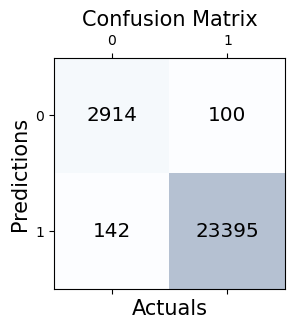

AUC: 0.9746389033424734


In [629]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

#Maybe its better to ignore the Column Sellerbewertung
#Testing without SellerID
#X = df[['asin','time', 'price', 'sellerId','sellerbewertung','seller_sterne','lieferpreis','Fulfillment_type','date_diff','numberOfSellers']]
X = df[['asin','time', 'price','sellerbewertung','seller_sterne','lieferpreis','Fulfillment_type','date_diff','numberOfSellers']]

#X = df[['asin','time','price']]
y = df['buyBoxWinner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Create and train the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)


# Calculate the confusion matrix
# The Printing of the confusion matrix, is partially buggy. Follow this Tutorial to retrive the right matrix:
##This Code is based on the Example from: https://vitalflux.com/python-draw-confusion-matrix-matplotlib/
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Swap True Positives and True Negatives
conf_matrix[0,0], conf_matrix[1,1] = conf_matrix[1,1], conf_matrix[0,0]

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Actuals', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)
plt.show()


#Area under The Curve ausrechnen lassen
# Calculate the AUC
#The AUC (area under the ROC curve) is a measure of the performance of a binary classification model. 
#It represents the degree to which the model is able to distinguish between positive and negative examples. 
#The AUC ranges from 0 to 1, with higher values indicating better performance.
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

#Balanced ACC
#bal_acc = balanced_accuracy_score(y_test, y_pred)
#print("Balanced accuracy:", bal_acc)

In [630]:
value_counts = y_test.value_counts()
# print the result
print(value_counts)
# Count the number of rows in the train and test sets
num_rows_train = X_train.shape[0]
num_rows_test = X_test.shape[0]
# Print the results
print(f'The number of rows in the train set is: {num_rows_train}')
print(f'The number of rows in the test set is: {num_rows_test}')

False    23495
True      3056
Name: buyBoxWinner, dtype: int64
The number of rows in the train set is: 61950
The number of rows in the test set is: 26551


In [631]:
##Qualitätsmaße
# Calculate the accuracy, aber ansich nicht so gutes Maß, da imbalanced Verteilung von BuyBox
#Gewichtete Accuracy berechnen
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 99.09%
Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      0.99     23495
        True       0.97      0.95      0.96      3056

    accuracy                           0.99     26551
   macro avg       0.98      0.97      0.98     26551
weighted avg       0.99      0.99      0.99     26551



In [632]:
## Print out Feature Importances
feature_importances = rfc.feature_importances_
feature_names = X.columns
# Create a DataFrame of the feature importances and their names
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by feature importances in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame of feature importances and their names
print(feature_importances_df)

            Feature  Importance
4     seller_sterne    0.233095
6  Fulfillment_type    0.166882
2             price    0.124840
3   sellerbewertung    0.122556
8   numberOfSellers    0.111931
0              asin    0.104305
5       lieferpreis    0.058625
7         date_diff    0.057681
1              time    0.020084


## K-Fold Cross Validation

In [628]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

# Define the scoring metrics to be used
scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']

# Perform 10-fold cross-validation
scores = cross_validate(rfc, X, y, cv=10, scoring=scoring)

# Print the mean F1 score, precision, and recall across all folds
print("Mean Accuracy: {:.2f}%".format(scores['test_accuracy'].mean() * 100))
print("Mean F1 Score: {:.2f}%".format(scores['test_f1_macro'].mean() * 100))
print("Mean Precision: {:.2f}%".format(scores['test_precision_macro'].mean() * 100))
print("Mean Recall: {:.2f}%".format(scores['test_recall_macro'].mean() * 100))

Mean Accuracy: 96.23%
Mean F1 Score: 91.28%
Mean Precision: 91.46%
Mean Recall: 91.87%


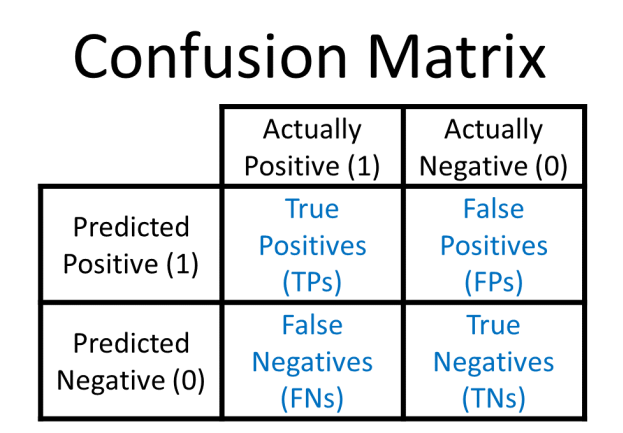

ACC: proportion of correctly classified samples out of the total number of samples. It is calculated as the number of true positives plus the number of true negatives, divided by the total number of samples. 
Precision: represents the proportion of true positive predictions out of the total number of positive predictions (i.e., the sum of true positives and false positives). It is calculated as the number of true positives, divided by the sum of true positives and false positives TP/(TP+FP)